# Figure 12

**Figure 12.** Net CRH uncertainties as a function of horizontal scale from 300 m to approximately 500 km for all LEM domains. For the
uncertainty due to the ice-optical parameterization, the CRH difference between the ice schemes of Fu and the ice scheme of Baum with the general habit mixture is used. Note the different y-axes in the panels.

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


## 2- Loading datasets

In [3]:
# Vertical profiles of MAD of CRH from different offline radiation calculation at different resolution for each LEM domain
ds_out = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure11.nc')
# make a copy
ds = ds_out.drop_vars(['res1','res2','height','rho_mean_icon_dom01','rho_mean_icon_dom02','rho_mean_icon_dom03','rho_mean_icon_dom04'])

## 3- Calculating weighted vertical mean of mean absolute differences (MAD)

In [4]:
def calc_weight(rho):
    dp = np.zeros((140))
    dp[1:-1] = (rho[2:] - rho[:-2]) 
    dp[0] = (rho[1] - rho[0]) 
    dp[-1] = (rho[-1] - rho[-2])
    dp = dp[::-1]
    return dp
    
var_lists = {}
for var in ds.variables:
    if var.startswith('dom01'):
        var_lists[var] = []
        # thickness for weight vertical mean
        dp = calc_weight(ds_out['rho_mean_icon_dom01'].values)
        tmp_list = []
        for i in range(len(ds[var])):
            tmp = ((ds[var][i][0:28].values * dp[0:28]).sum())/(dp[0:28].sum())
            tmp_list.append(tmp) 
        var_lists[var].append(tmp_list)
        
    elif var.startswith('dom02'):
        var_lists[var] = []
        # thickness for weight vertical mean
        dp = calc_weight(ds_out['rho_mean_icon_dom02'].values)
        tmp_list = []
        for i in range(len(ds[var])):
            tmp = ((ds[var][i][0:92].values * dp[0:92]).sum())/(dp[0:92].sum())
            tmp_list.append(tmp) 
        var_lists[var].append(tmp_list)
        
    elif var.startswith('dom03'):
        var_lists[var] = []
        # thickness for weight vertical mean
        dp = calc_weight(ds_out['rho_mean_icon_dom03'].values)
        tmp_list = []
        for i in range(len(ds[var])):
            tmp = ((ds[var][i][0:92].values * dp[0:92]).sum())/(dp[0:92].sum())
            tmp_list.append(tmp) 
        var_lists[var].append(tmp_list) 
        
    elif var.startswith('dom04'):
        var_lists[var] = []
        # thickness for weight vertical mean
        dp = calc_weight(ds_out['rho_mean_icon_dom04'].values)
        tmp_list = []
        for i in range(len(ds[var])):
            tmp = ((ds[var][i][0:92].values * dp[0:92]).sum())/(dp[0:92].sum())
            tmp_list.append(tmp) 
        var_lists[var].append(tmp_list)      

## 4- Plot

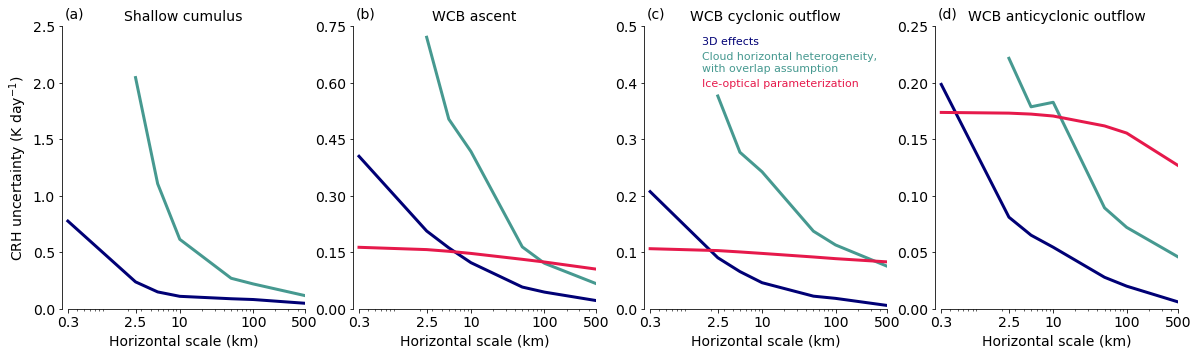

In [12]:
x1 = np.array([0.3, 2.5, 5, 10, 50, 100, 500])
x2 = np.array([2.5, 5, 10, 50, 100, 500])

x_ticks = np.array([0.3, 2.5, 10, 100, 500])
x_int = ['0.3','2.5','10','100','500']

# plot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5.2))

i = 0

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    
    if i == 0:

        # Set x-axis to logarithmic scale
        ax.set_xscale('log')

        ax.plot(x1, var_lists['dom01_3d_nt_error'][0],color='#000075',lw=3,label='3D effects')
        #ax.plot(x1, var_lists['dom01_3d_lw_error'][0],color='#000075',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom01_3d_sw_error'][0],color='#000075',lw=2,ls='dotted')
        
        ax.plot(x2, var_lists['dom01_vo_nt_error'][0],color='#469990',lw=3,label='Horizontal heterogeneity\nand vertical overlap')
        #ax.plot(x2, var_lists['dom01_vo_lw_error'][0],color='#469990',lw=2,ls='dashed')
        #ax.plot(x2, var_lists['dom01_vo_sw_error'][0],color='#469990',lw=2,ls='dotted')
        
        ax.set_ylabel('CRH uncertainty (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.set_xlabel('Horizontal scale (km)', fontsize=14)#,labelpad=10)
        
        ax.set_title('Shallow cumulus', fontsize=14)#,labelpad=10)
        ax.text(0.01, 1.03, '(a)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['left'].set_bounds(0,2.5)
        ax.set_yticks(np.linspace(0,2.5,6))
        ax.set_ylim([0,2.5])
        
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_int)
        ax.set_xlim([0.25,500])
        ax.spines['bottom'].set_bounds(0.3,500)

    if i == 1:

        # Set x-axis to logarithmic scale
        ax.set_xscale('log')

        ax.plot(x1, var_lists['dom02_3d_nt_error'][0],color='#000075',lw=3,label='3D effects')
        #ax.plot(x1, var_lists['dom02_3d_lw_error'][0],color='#000075',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom02_3d_sw_error'][0],color='#000075',lw=2,ls='dotted')
        
        ax.plot(x2, var_lists['dom02_vo_nt_error'][0],color='#469990',lw=3,label='Horizontal heterogeneity\nand vertical overlap')
        #ax.plot(x2, var_lists['dom02_vo_lw_error'][0],color='#469990',lw=2,ls='dashed')
        #ax.plot(x2, var_lists['dom02_vo_sw_error'][0],color='#469990',lw=2,ls='dotted')
        
        ax.plot(x1, var_lists['dom02_ic_nt_error'][0],color='#e6194B',lw=3,label='Ice-optical parameterization')
        #ax.plot(x1, var_lists['dom02_ic_lw_error'][0],color='#e6194B',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom02_ic_sw_error'][0],color='#e6194B',lw=2,ls='dotted')
        
        ax.set_xlabel('Horizontal scale (km)', fontsize=14)
        
        ax.set_title('WCB ascent', fontsize=14)
        ax.text(0.01, 1.03, '(b)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['left'].set_bounds(0,0.75)
        ax.set_yticks(np.linspace(0,0.75,6))
        ax.set_ylim([0,0.75])    
        
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_int)
        ax.set_xlim([0.25,500])
        ax.spines['bottom'].set_bounds(0.3,500)
        
    if i == 2:
        # Create an empty list to store the max values
        
        ax.plot(x1, var_lists['dom03_3d_nt_error'][0],color='#000075',lw=3,label='3D effects')
        #ax.plot(x1, var_lists['dom03_3d_lw_error'][0],color='#000075',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom03_3d_sw_error'][0],color='#000075',lw=2,ls='dotted')
        
        ax.plot(x2, var_lists['dom03_vo_nt_error'][0],color='#469990',lw=3,label='Cloud horizontal heterogeneity,\nwith overlap assumption')
        #ax.plot(x2, var_lists['dom03_vo_lw_error'][0],color='#469990',lw=2,ls='dashed')
        #ax.plot(x2, var_lists['dom03_vo_sw_error'][0],color='#469990',lw=2,ls='dotted')
        
        ax.plot(x1, var_lists['dom03_ic_nt_error'][0],color='#e6194B',lw=3,label='Ice-optical parameterization')
        #ax.plot(x1, var_lists['dom03_ic_lw_error'][0],color='#e6194B',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom03_ic_sw_error'][0],color='#e6194B',lw=2,ls='dotted')

        ax.set_xscale('log')
        #ax.set_ylabel('CRH uncertainty (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.set_xlabel('Horizontal scale (km)', fontsize=14)#,labelpad=10)
        ax.set_title('WCB cyclonic outflow', fontsize=14)#,labelpad=10)
        ax.text(0.01, 1.03, '(c)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['left'].set_bounds(0,0.5)
        ax.set_yticks(np.linspace(0,0.5,6))
        ax.set_ylim([0,0.5])
        
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_int)
        ax.set_xlim([0.25,500])
        ax.spines['bottom'].set_bounds(0.3,500)
        
        lg=colorlegend.color_legend(ax,loc=1,fsize=11)   
        
    if i == 3:
        
        ax.plot(x1, var_lists['dom04_3d_nt_error'][0],color='#000075',lw=3,label='3D effects')
        #ax.plot(x1, var_lists['dom04_3d_lw_error'][0],color='#000075',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom04_3d_sw_error'][0],color='#000075',lw=2,ls='dotted')
        
        ax.plot(x2, var_lists['dom04_vo_nt_error'][0],color='#469990',lw=3,label='Horizontal heterogeneity\nand vertical overlap')
        #ax.plot(x2, var_lists['dom04_vo_lw_error'][0],color='#469990',lw=2,ls='dashed')
        #ax.plot(x2, var_lists['dom04_vo_sw_error'][0],color='#469990',lw=2,ls='dotted')
        
        ax.plot(x1, var_lists['dom04_ic_nt_error'][0],color='#e6194B',lw=3,label='Ice-optical parameterization')
        #ax.plot(x1, var_lists['dom04_ic_lw_error'][0],color='#e6194B',lw=2,ls='dashed')
        #ax.plot(x1, var_lists['dom04_ic_sw_error'][0],color='#e6194B',lw=2,ls='dotted')
        
        ax.set_xscale('log')
        
        #ax.set_ylabel('CRH uncertainty (K day$^{-1}$)', fontsize=14)#,labelpad=10)
        ax.set_xlabel('Horizontal scale (km)', fontsize=14)#,labelpad=10)
        ax.set_title('WCB anticyclonic outflow', fontsize=14)#,labelpad=10)
        ax.text(0.01, 1.03, '(d)', transform=ax.transAxes, 
            size=14)
        
        ax.spines['left'].set_bounds(0,0.25)
        ax.set_yticks(np.linspace(0,0.25,6))
        ax.set_ylim([0,0.25])
        
        ax.set_xticks(x_ticks)
        ax.set_xticklabels(x_int)
        ax.set_xlim([0.25,500])
        ax.spines['bottom'].set_bounds(0.3,500)
        
        #ax.text(1.2, 0.75, 'solid: Net', color='gray', size=12, va="top")
        #ax.text(1.2, 0.70, 'dashed: Longwave', color='gray', size=12, va="top")
        #ax.text(1.2, 0.65, 'dotted: Shortwave', color='gray', size=12, va="top")
        
        
    i = i + 1

fig.subplots_adjust(wspace=0.2)
plt.savefig('figure12.pdf', bbox_inches = 'tight')
plt.savefig('figure12.png', bbox_inches = 'tight',dpi=300)